<a href="https://colab.research.google.com/github/minayen102636/REC-for-UMD-Alumni-Assoc./blob/main/Project_0507_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#import and combine the sheets into one pandas DataFrame
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None))
df.describe()

Participated  Average Age  ...  Major Prospects  Percentage Major Prospect
count    622.000000   622.000000  ...       622.000000                 622.000000
mean      44.803859    40.117363  ...         5.966238                   0.102214
std       93.165049     9.741459  ...        14.123466                   0.131444
min        1.000000    19.000000  ...         0.000000                   0.000000
25%       10.000000    33.000000  ...         0.000000                   0.000000
50%       20.000000    40.000000  ...         1.000000                   0.058824
75%       44.750000    46.000000  ...         5.000000                   0.166667
max     1657.000000    75.000000  ...       131.000000                   0.818182

[8 rows x 6 columns]

In [ ]:
df.corr()

Participated  ...  Percentage Major Prospect
Participated                         1.000000  ...                   0.113415
Average Age                          0.037616  ...                   0.549320
First Time Attendees                 0.835996  ...                   0.051069
Percentage First Time Attendees      0.047840  ...                   0.067701
Major Prospects                      0.658973  ...                   0.481370
Percentage Major Prospect            0.113415  ...                   1.000000

[6 rows x 6 columns]

# **Average Age**

In [ ]:
#Averagre Age Summary
print(df['Average Age'].describe())

#The average age is around 40 years old. The youngest age is 19 years old.

count    622.000000
mean      40.117363
std        9.741459
min       19.000000
25%       33.000000
50%       40.000000
75%       46.000000
max       75.000000
Name: Average Age, dtype: float64


In [ ]:
#clean age that has less than 5 ppl
dataClean = df.groupby(["Average Age"])["Event Name"].count()
clean = df['Average Age'].isin([19, 72,70, 69, 68, 65, 63, 61, 74, 75, 20, 64, 57, 60, 58, 67, 66, 24, 59, 54, 62])
dfAge  = df[~clean]

(Mission1)

Average Age
21    0.671010
26    0.585062
22    0.491453
27    0.468864
23    0.460432
30    0.396667
25    0.378049
35    0.371711
51    0.368486
50    0.353562
dtype: float64


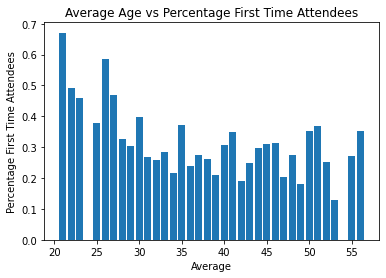

In [ ]:
dataFT = dfAge.groupby(["Average Age"])["First Time Attendees"].sum()
dataPT = dfAge.groupby(["Average Age"])["Participated"].sum()
dataPFT = dataFT/dataPT

dataPFTsorted = dataPFT.sort_values(ascending=False)
print(dataPFTsorted.head(10))

plt.title("Average Age vs Percentage First Time Attendees")
plt.xlabel('Average')
plt.ylabel('Percentage First Time Attendees')
plt.bar(dataPFT.index, dataPFT)
plt.show()

#The first time attendees are usually less than 30 years olds.

Group Code
PS9    24
PA9    18
PSY    13
PSS    10
PC4     7
Name: Average Age, dtype: int64


Text(0.5, 1.0, 'Events with high first time attendees rate among top 10 ages')

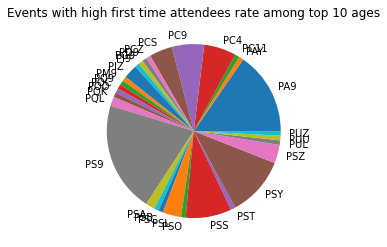

In [ ]:
dataFirstTop10 = dfAge[dfAge["Average Age"].isin([21,26,22,27,23,30,25,35,51,50])]

dataFirstGroup = dataFirstTop10.groupby(["Group Code"])["Average Age"].count()
dataFirstGroupsorted = dataFirstGroup.sort_values(ascending=False)

print(dataFirstGroupsorted.head())

plt.pie(dataFirstGroup,labels=dataFirstGroup.index)
plt.title("Events with high first time attendees rate among top 10 ages")

#Among ages with higher percentage first time attendees, these people usually first attends social and athletics events.

Location Code
PDON    28
PDNA    21
PDBA    11
PDDC    11
PDMC     6
Name: Average Age, dtype: int64


Text(0.5, 1.0, 'Locations with high first time attendees rate among top 10 ages')

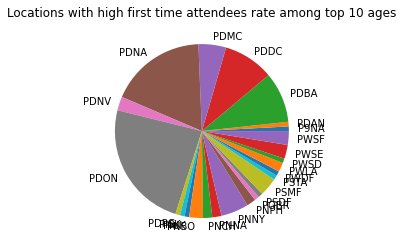

In [ ]:
dataFirstLoc = dataFirstTop10.groupby(["Location Code"])["Average Age"].count()
dataFirstLocsorted = dataFirstLoc.sort_values(ascending=False)

print(dataFirstLocsorted.head())

plt.pie(dataFirstLoc,labels=dataFirstLoc.index)
plt.title("Locations with high first time attendees rate among top 10 ages")

#Among ages with higher percentage first time attendees, these people usually first attends events in campus.

In [ ]:
dataYoung = dfAge[dfAge["Average Age"] <= 30]
dataElder = dfAge[dfAge["Average Age"] >= 50]

In [ ]:
dataYoungGroup = dataYoung.groupby(["Group Code"])["Average Age"].count()
dataYoungGroupsorted = dataYoungGroup.sort_values(ascending=False)
dataYoungGroupsorted.head(3)

#Among ages with higher percentage first time attendes, young people (age below 30 years old)might prefer attending social and athletics events.

Group Code
PS9    19
PA9    17
PSY    13
Name: Average Age, dtype: int64

In [ ]:
dataElderGroup = dataElder.groupby(["Group Code"])["Average Age"].count()
dataElderGroupsorted = dataElderGroup.sort_values(ascending=False)
dataElderGroupsorted.head(3)

#Older people (age more than 50 years old) might prefer attending social events.

Group Code
PS9    16
PA9    11
PHM     6
Name: Average Age, dtype: int64

In [ ]:
dataYoungLoc = dataYoung.groupby(["Location Code"])["Average Age"].count()
dataYoungLocsorted = dataYoungLoc.sort_values(ascending=False)
dataYoungLocsorted.head(3)

Location Code
PDON    24
PDDC    17
PDNA    14
Name: Average Age, dtype: int64

In [ ]:
dataElderLoc = dataElder.groupby(["Location Code"])["Average Age"].count()
dataElderLocsorted = dataElderLoc.sort_values(ascending=False)
dataElderLocsorted.head(3)

#Older people (age more than 60 years old) might prefer attending social events.

Location Code
PDON    21
PDNA     7
PSMF     5
Name: Average Age, dtype: int64

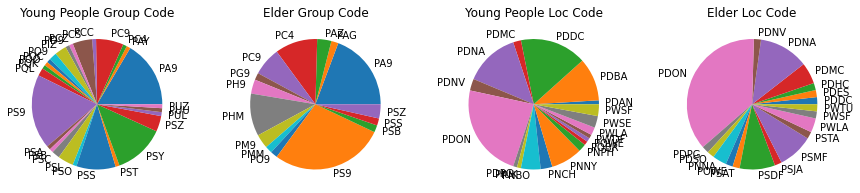

In [ ]:
#Using pie chart to show the distribution
plt.figure(figsize=(15, 3))

plt.subplot(141)
plt.pie(dataYoungGroup,labels=dataYoungGroup.index)
plt.title("Young People Group Code")

plt.subplot(142)
plt.pie(dataElderGroup,labels=dataElderGroup.index)
plt.title("Elder Group Code")

plt.subplot(143)
plt.pie(dataYoungLoc,labels=dataYoungLoc.index)
plt.title("Young People Loc Code")

plt.subplot(144)
plt.pie(dataElderLoc,labels=dataElderLoc.index)
plt.title("Elder Loc Code")


plt.show()

(Mission 2)

Average Age
50    0.358839
55    0.336207
56    0.287234
52    0.281382
51    0.270471
dtype: float64


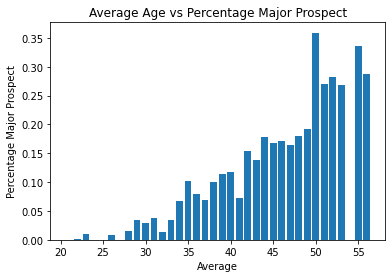

In [ ]:
dataMP = dfAge.groupby(["Average Age"])["Major Prospects"].sum()
dataPT = dfAge.groupby(["Average Age"])["Participated"].sum()
dataPMT = dataMP/dataPT
dataPMTsorted = dataPMT.sort_values(ascending=False)
print(dataPMTsorted.head())

plt.title("Average Age vs Percentage Major Prospect")
plt.xlabel('Average')
plt.ylabel('Percentage Major Prospect')
plt.bar(dataPMT.index, dataPMT)
plt.show()

#People who is around 50-74 years old might has more ability to make a financial gift of $50,000 or more to the university. 

Group Code
PS9    14
PA9    10
PHM     6
Name: Average Age, dtype: int64


Text(0.5, 1.0, 'Events with high first major prospect rate with ages >= 50')

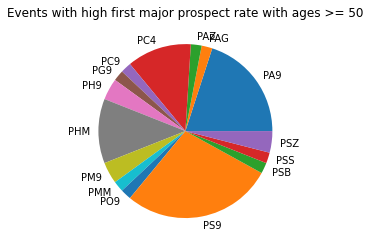

In [ ]:
dataProspectTop = dfAge[(dfAge["Average Age"] >= 50) & (dfAge["Average Age"] <= 55)]

dataProspectGroup = dataProspectTop.groupby(["Group Code"])["Average Age"].count()
dataProspectGroupsorted = dataProspectGroup.sort_values(ascending=False)

print(dataProspectGroupsorted.head(3))

plt.pie(dataProspectGroup,labels=dataProspectGroup.index)
plt.title("Events with high first major prospect rate with ages >= 50")

#People who has more ability to make a finanacial gift usually attends social or athletics events.

Location Code
PDON    20
PDNA     7
PSMF     5
PSDF     3
PDMC     3
Name: Average Age, dtype: int64


Text(0.5, 1.0, 'Locations with high Percentage Major Prospect with ages >= 50')

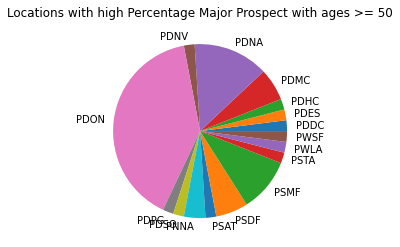

In [ ]:
dataProspectLoc = dataProspectTop.groupby(["Location Code"])["Average Age"].count()
dataProspectLocsorted = dataProspectLoc.sort_values(ascending=False)

print(dataProspectLocsorted.head())

plt.pie(dataProspectLoc,labels=dataProspectLoc.index)
plt.title("Locations with high Percentage Major Prospect with ages >= 50")

#Among ages with higher percentage first time attendees, these people usually first attends events in campus.

#**Group Code**

(Mission 1)

[['PSS', 106.143], ['PM9', 37.333], ['PI9', 29.2], ['PVW', 27.0], ['PAB', 27.0], ['PHM', 25.333], ['PSO', 24.0], ['PSZ', 20.0], ['PS3', 18.167], ['PSB', 16.4], ['PD9', 15.846], ['PH9', 15.667], ['PC9', 14.908], ['PAY', 14.0], ['PSX', 14.0], ['POC', 14.0], ['PA9', 13.125], ['PSA', 13.0], ['PUL', 13.0], ['PQL', 12.5], ['PSL', 11.0], ['PAZ', 10.8], ['PST', 10.333], ['PCC', 10.0], ['PSK', 9.333], ['P99', 8.75], ['PS9', 8.744], ['PG9', 8.333], ['PMM', 8.0], ['POO', 8.0], ['PAG', 8.0], ['PSC', 7.333], ['PUU', 7.0], ['PSY', 6.867], ['PCS', 6.667], ['PC4', 6.074], ['PCZ', 6.0], ['PUB', 6.0], ['PU9', 5.667], ['POB', 5.5], ['PQX', 5.0], ['PCW', 3.5], ['PO9', 3.0], ['PQB', 2.0], ['PUZ', 2.0], ['PC10', 2.0], ['PQK', 1.0], ['PC11', 1.0], ['PIZ', 0.5]]


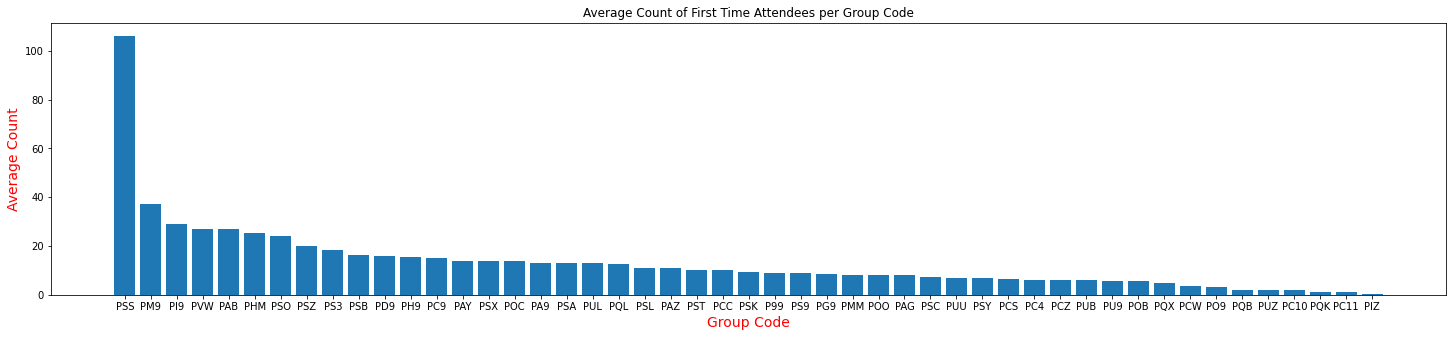

In [ ]:
#First Time Attendees Count
dict2 = dict()

for index, row in df.iterrows():
    group_code = row['Group Code']
    cnt_first_attendees = row['First Time Attendees']
    if group_code in dict2:
        dict2[group_code][0] += 1
        dict2[group_code][1] += cnt_first_attendees
    elif cnt_first_attendees > 0:
        dict2[group_code] = [1, cnt_first_attendees]

avgcnt_first_attendees = [[x[0], x[1][1]/x[1][0]] for x in dict2.items()]
for avg in avgcnt_first_attendees:
    avg[1] = round(avg[1], 3)
print(sorted(avgcnt_first_attendees, key=lambda x: x[1], reverse=True))

data = sorted(avgcnt_first_attendees, key=lambda x: x[1], reverse=True)

x = [x for x, y in data]
y = [y for x, y in data]

plt.figure(figsize=(25, 5))
plt.xlabel("Group Code", fontsize=14,color='red')  
plt.ylabel("Average Count", fontsize=14,color='red') 
plt.title("Average Count of First Time Attendees per Group Code") 
plt.bar(x, y)
plt.show()

[['POO', 0.8], ['P99', 0.727], ['PSO', 0.649], ['PUL', 0.619], ['PSS', 0.612], ['PSK', 0.595], ['PAB', 0.577], ['PSB', 0.517], ['POC', 0.5], ['PQL', 0.495], ['PCC', 0.455], ['PSY', 0.445], ['PAY', 0.438], ['PVW', 0.429], ['PI9', 0.42], ['PAZ', 0.4], ['PUB', 0.4], ['PAG', 0.399], ['PCS', 0.387], ['PS3', 0.346], ['PM9', 0.345], ['PSA', 0.341], ['PSL', 0.332], ['PSZ', 0.331], ['PSC', 0.323], ['PST', 0.321], ['PSX', 0.298], ['PO9', 0.289], ['PA9', 0.269], ['POB', 0.256], ['PC4', 0.252], ['PC9', 0.248], ['PS9', 0.243], ['PU9', 0.237], ['PHM', 0.231], ['PD9', 0.215], ['PQK', 0.2], ['PUZ', 0.2], ['PC10', 0.182], ['PH9', 0.165], ['PCW', 0.14], ['PC11', 0.125], ['PQX', 0.122], ['PG9', 0.107], ['PUU', 0.092], ['PCZ', 0.083], ['PMM', 0.056], ['PIZ', 0.038], ['PQB', 0.036]]


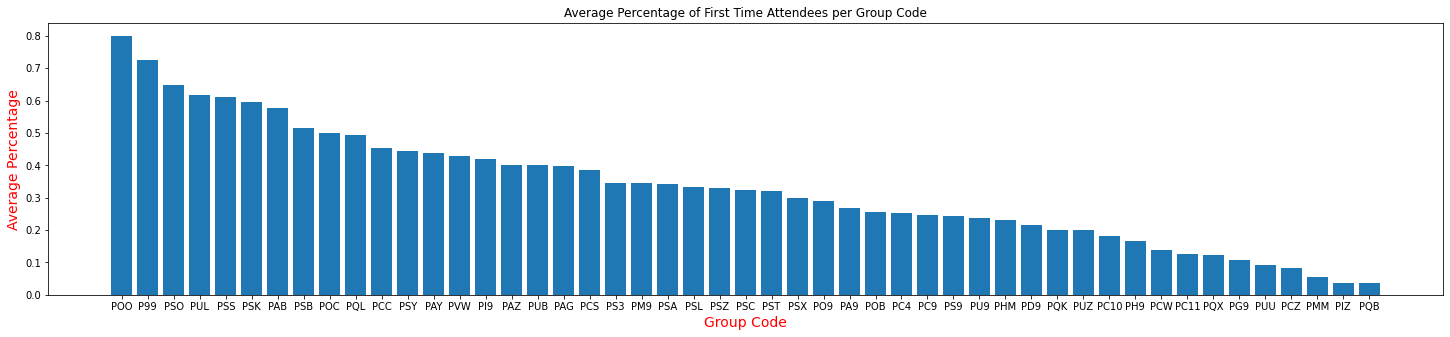

In [ ]:
#First Time Attendees Percentage
# df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None))

dict2 = dict()

for index, row in df.iterrows():
    group_code = row['Group Code']
    per_first_attendees = row['Percentage First Time Attendees']
    if group_code in dict2:
        dict2[group_code][0] += 1
        dict2[group_code][1] += per_first_attendees
    elif per_first_attendees > 0:
        dict2[group_code] = [1, per_first_attendees]

avgper_first_attendees = [[x[0], x[1][1]/x[1][0]] for x in dict2.items()]
for avg in avgper_first_attendees:
    avg[1] = round(avg[1], 3)
print(sorted(avgper_first_attendees, key=lambda x: x[1], reverse=True))

data = sorted(avgper_first_attendees, key=lambda x: x[1], reverse=True)

x = [x for x, y in data]
y = [y for x, y in data]

plt.figure(figsize=(25, 5))
plt.xlabel("Group Code", fontsize=14,color='red')  
plt.ylabel("Average Percentage", fontsize=14,color='red') 
plt.title("Average Percentage of First Time Attendees per Group Code") 
plt.bar(x, y)
plt.show()

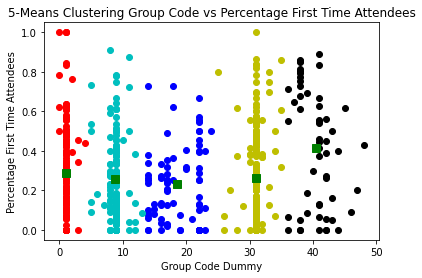

In [ ]:
#5-Means Clustering - Percentage First Time Attendees

df['GroupCode_dum'] = df['Group Code'].astype('category').cat.codes

import numpy as np 
from scipy.cluster.vq import kmeans, vq 

data = np.array(df[["GroupCode_dum", "Percentage First Time Attendees"]])

# compute k-means with k = 5 (5 clusters) 
centroids,_ = kmeans(data, 5) 

# assign each sample to a cluster 
index,_ = vq(data,centroids) 
from matplotlib.pyplot import plot, show 

# plot different color for each cluster by its index 
plot(data[index==0,0],data[index==0,1],'or') 
plot(data[index==1,0],data[index==1,1],'ob')
plot(data[index==2,0],data[index==2,1],'oc') 
plot(data[index==3,0],data[index==3,1],'oy')
plot(data[index==4,0],data[index==4,1],'ok') 
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees')
plt.title('5-Means Clustering Group Code vs Percentage First Time Attendees')
show() 

0.3220978138286085 -0.03227164187747469
[ 0.32209782 -0.03227165]


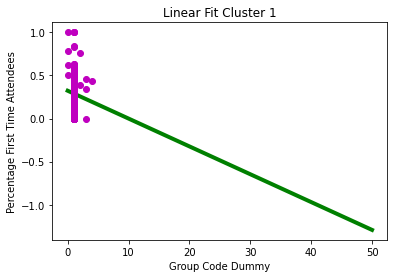

<Figure size 432x288 with 0 Axes>

0.07768883972782106 0.008451702643675764
[0.07768883 0.0084517 ]


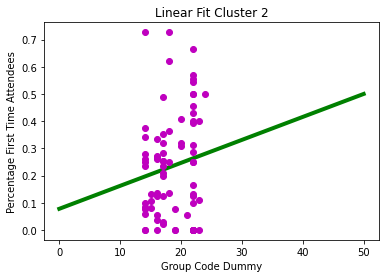

0.37452117624743536 -0.013405498927013522
[ 0.37452117 -0.0134055 ]


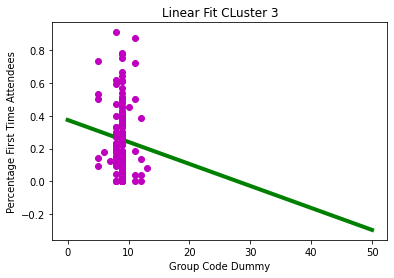

-0.4722588836404087 0.023649348699555515
[-0.47225888  0.02364935]


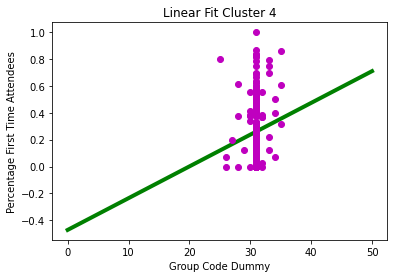

1.6766736749529858 -0.031154044785274403
[ 1.67667372 -0.03115405]


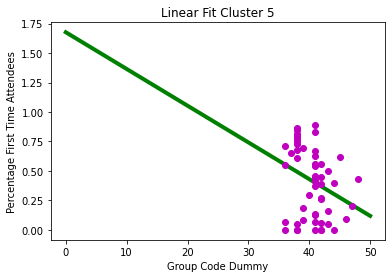

In [ ]:
#Regression - Percentage First Time Attendees

df['GroupCode_dum'] = df['Group Code'].astype('category').cat.codes
from scipy.stats import linregress 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 

# linear fit cluster 1
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==0,0], data[index==0,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==0,0], data[index==0,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 1")
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees')
plt.axis 
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==0,0], data[index==0,1], 'om') 
# display figure 
figure= plt.figure()
figure.tight_layout() 
plt.show() 

# linear fit cluster 2
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==1,0], data[index==1,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==1,0], data[index==1,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 2") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==1,0], data[index==1,1], 'om') 
# display figure 
figure.tight_layout() 
plt.show() 

# linear fit cluster 3
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==2,0], data[index==2,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==2,0], data[index==2,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit CLuster 3") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==2,0], data[index==2,1], 'om') 
# display figure 
figure.tight_layout() 
plt.show() 

# linear fit cluster 4
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==3,0], data[index==3,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==3,0], data[index==3,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 4") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==3,0], data[index==3,1], 'om') 
# display figure 
figure.tight_layout() 
plt.show() 

# linear fit cluster 5
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==4,0], data[index==4,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==4,0], data[index==4,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 5")
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage First Time Attendees') 
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==4,0], data[index==4,1], 'om') 
# display figure 
figure.tight_layout() 
plt.show() 

In [ ]:
#Regression Results - Percentage First Time Attendees
linSlope0, linIntercept0, linR0, linP0, linSE0 = linregress (data[index==0,0], data[index==0,1])
print(linP0)
linSlope1, linIntercept1, linR1, linP1, linSE1 = linregress (data[index==1,0], data[index==1,1])
print(linP1)
linSlope2, linIntercept2, linR2, linP2, linSE2 = linregress (data[index==2,0], data[index==2,1])
print(linP2)
linSlope3, linIntercept3, linR3, linP3, linSE3 = linregress (data[index==3,0], data[index==3,1])
print(linP3)
linSlope4, linIntercept4, linR4, linP4, linSE4 = linregress (data[index==4,0], data[index==4,1])
print(linP4)

0.5147564050396883
0.22170592503229827
0.39320540179944574
0.12545720613238892
0.03503597258591595


In [ ]:
print(data[index==2,:])

[[ 9.          0.14285714]
 [ 9.          0.07142857]
 [ 9.          0.04545455]
 [ 9.          0.08064516]
 [ 9.          0.08888889]
 [ 8.          0.11111111]
 [ 9.          0.05405405]
 [ 9.          0.06837607]
 [ 9.          0.04      ]
 [ 9.          0.05454545]
 [ 9.          0.08333333]
 [ 9.          0.11111111]
 [ 8.          0.        ]
 [ 9.          0.        ]
 [13.          0.08333333]
 [ 9.          0.0625    ]
 [ 9.          0.        ]
 [ 9.          0.14285714]
 [ 9.          0.04      ]
 [ 9.          0.42365721]
 [ 9.          0.5       ]
 [ 8.          0.3       ]
 [ 9.          0.3       ]
 [ 9.          0.57142857]
 [ 8.          0.90909091]
 [ 9.          0.3       ]
 [ 9.          0.45454545]
 [ 9.          0.5       ]
 [ 5.          0.73076923]
 [ 9.          0.66666667]
 [ 5.          0.53571429]
 [ 8.          0.59375   ]
 [ 8.          0.61538462]
 [11.          0.1875    ]
 [ 8.          0.46875   ]
 [ 9.          0.5       ]
 [ 9.          0.77777778]
 

In [ ]:
df.to_excel('Project_0507_04_FullData.xlsx')

Text(0.5, 1.0, '2019-20 Percentage of First Time Attendees \n vs Group Code and Average Age')

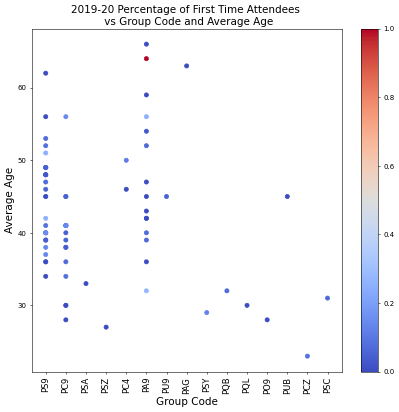

In [ ]:
import pandas as pd
df19 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2019-20')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(df19['Group Code'], df19['Average Age'], c=df19['Percentage First Time Attendees'],cmap=plt.cm.coolwarm, label = 1-df19['Percentage First Time Attendees'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2019-20 Percentage of First Time Attendees \n vs Group Code and Average Age', size=15)


Text(0.5, 1.0, '2018-19 Percentage of First Time Attendees \n vs Group Code and Average Age')

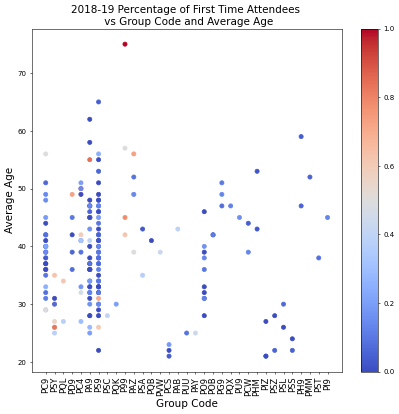

In [ ]:
import pandas as pd
df18 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2018-19')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(df18['Group Code'], df18['Average Age'], c=df18['Percentage First Time Attendees'],cmap=plt.cm.coolwarm, label = 1-df18['Percentage First Time Attendees'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2018-19 Percentage of First Time Attendees \n vs Group Code and Average Age', size=15)


Text(0.5, 1.0, '2017-18 Percentage of First Time Attendees \n vs Group Code and Average Age')

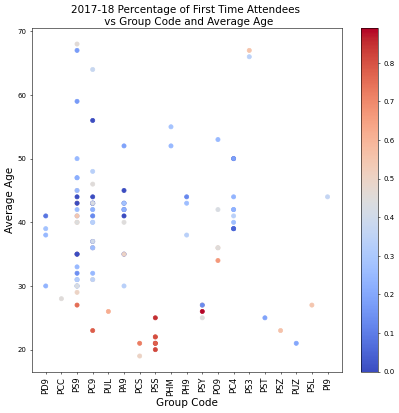

In [ ]:
import pandas as pd
df17 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2017-18')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(df17['Group Code'], df17['Average Age'], c=df17['Percentage First Time Attendees'],cmap=plt.cm.coolwarm, label = 1-df17['Percentage First Time Attendees'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2017-18 Percentage of First Time Attendees \n vs Group Code and Average Age', size=15)

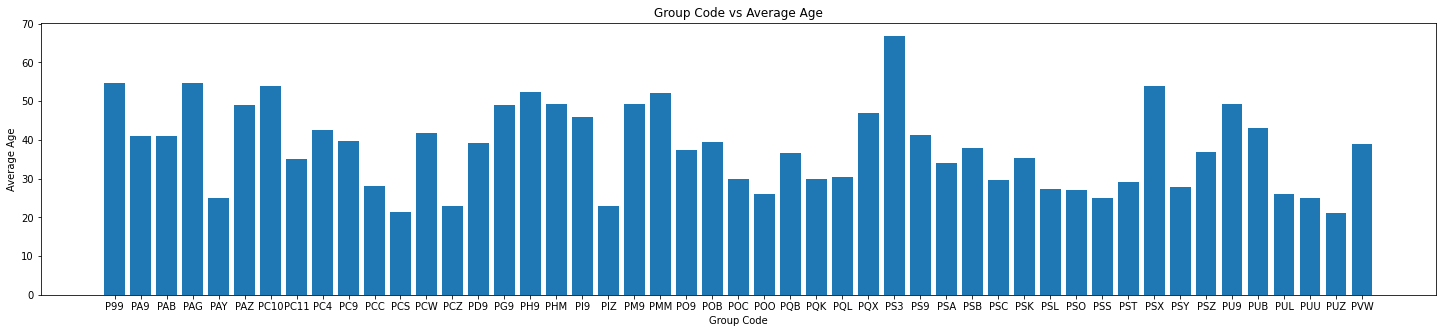

In [ ]:
#Age per Group Code
Total_Average_Age = df.groupby(['Group Code'])['Average Age'].mean()
Total_Average_Age

plt.figure(figsize=(25, 5))
plt.xlabel('Group Code')
plt.ylabel('Average Age')
plt.title('Group Code vs Average Age')
plt.bar(Total_Average_Age.index, Total_Average_Age)
plt.show()


(Mission 2)

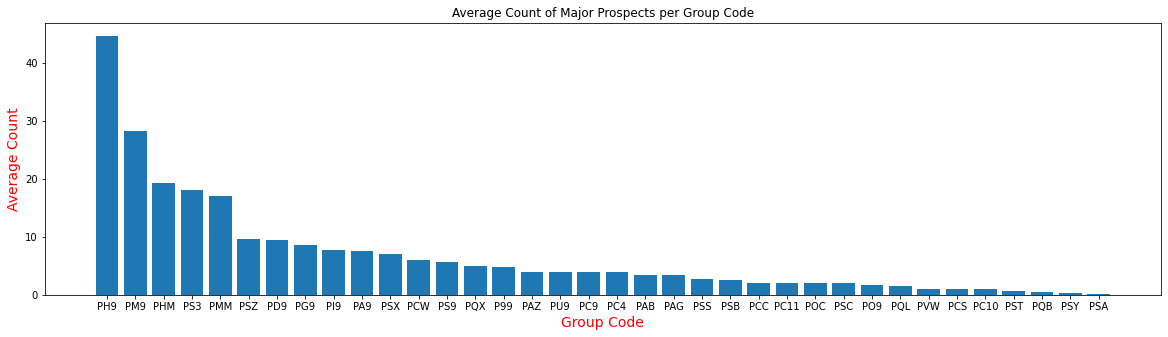

In [ ]:
#Major Prospects Count
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None))

dict1 = dict()

for index, row in df.iterrows():
    group_code = row['Group Code']
    cnt_major_prospects = row['Major Prospects']
    if group_code in dict1:
        dict1[group_code][0] += 1
        dict1[group_code][1] += cnt_major_prospects
    elif cnt_major_prospects > 0:
        dict1[group_code] = [1, cnt_major_prospects]

avgcnt_major_prospect = [[x[0], x[1][1]/x[1][0]] for x in dict1.items()]
for avg in avgcnt_major_prospect:
    avg[1] = round(avg[1], 3)
sorted(avgcnt_major_prospect, key=lambda x: x[1], reverse=True)

data = sorted(avgcnt_major_prospect, key=lambda x: x[1], reverse=True)

x = [x for x, y in data]
y = [y for x, y in data]

plt.figure(figsize=(20, 5))
plt.xlabel("Group Code", fontsize=14,color='red')  
plt.ylabel("Average Count", fontsize=14,color='red') 
plt.title("Average Count of Major Prospects per Group Code") 
plt.bar(x, y)
plt.show()

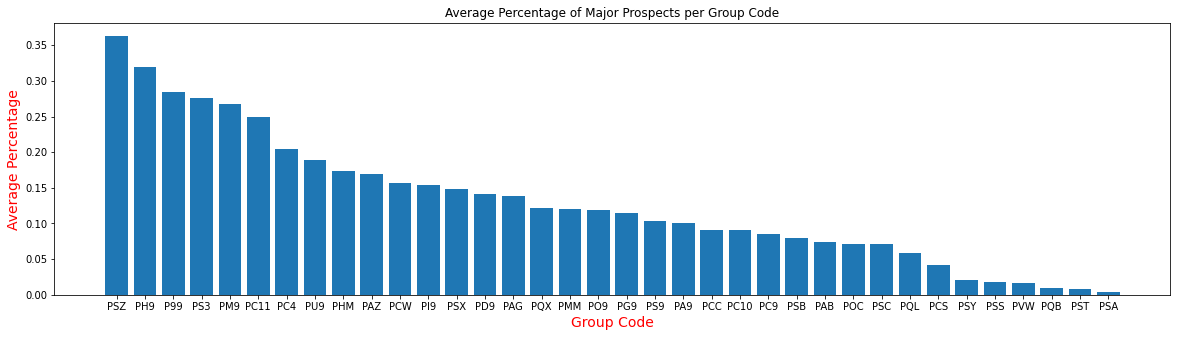

In [ ]:
#Major Prospects Percentage
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None))

dict1 = dict()

for index, row in df.iterrows():
    group_code = row['Group Code']
    per_major_prospects = row['Percentage Major Prospect']
    if group_code in dict1:
        dict1[group_code][0] += 1
        dict1[group_code][1] += per_major_prospects
    elif per_major_prospects > 0:
        dict1[group_code] = [1, per_major_prospects]

avgper_major_prospect = [[x[0], x[1][1]/x[1][0]] for x in dict1.items()]
for avg in avgper_major_prospect:
    avg[1] = round(avg[1], 3)
sorted(avgper_major_prospect, key=lambda x: x[1], reverse=True)

data = sorted(avgper_major_prospect, key=lambda x: x[1], reverse=True)

x = [x for x, y in data]
y = [y for x, y in data]

plt.figure(figsize=(20, 5))
plt.xlabel("Group Code", fontsize=14,color='red')  
plt.ylabel("Average Percentage", fontsize=14,color='red') 
plt.title("Average Percentage of Major Prospects per Group Code") 
plt.bar(x, y)
plt.show()

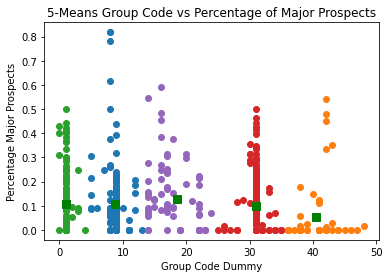

In [ ]:
#5-Means Clustering - Percentage Major Prospects
df['GroupCode_dum'] = df['Group Code'].astype('category').cat.codes

import numpy as np 
from scipy.cluster.vq import kmeans, vq 

data = np.array(df[["GroupCode_dum", "Percentage Major Prospect"]])

# compute k-means with k = 5 (5 clusters) 
centroids,_ = kmeans(data, 5) 

# assign each sample to a cluster 
index,_ = vq(data,centroids) 
from matplotlib.pyplot import plot, show 

# plot different color for each cluster by its index 
plot(data[index==0,0],data[index==0,1],'o') 
plot(data[index==1,0],data[index==1,1],'o')
plot(data[index==2,0],data[index==2,1],'o') 
plot(data[index==3,0],data[index==3,1],'o')
plot(data[index==4,0],data[index==4,1],'o') 
plot(centroids[:,0],centroids[:,1],'sg',markersize=8) 
plt.xlabel("Group Code Dummy") 
plt.ylabel("Percentage Major Prospects") 
plt.title("5-Means Group Code vs Percentage of Major Prospects")
show() 

0.34159234412938094 -0.02632733512922991
[ 0.34159234 -0.02632734]


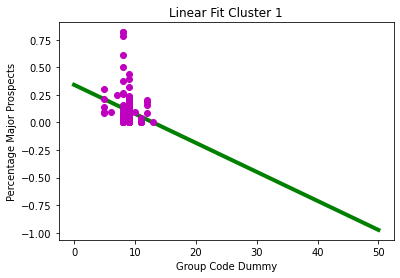

-0.28438158003478 0.008323968255291171
[-0.28438158  0.00832397]


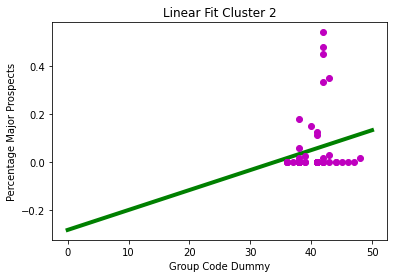

0.14072631918151862 -0.03351548914571767
[ 0.14072632 -0.03351549]


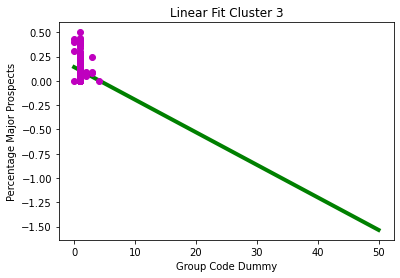

0.2696854969864797 -0.005485861987487174
[ 0.2696855  -0.00548586]


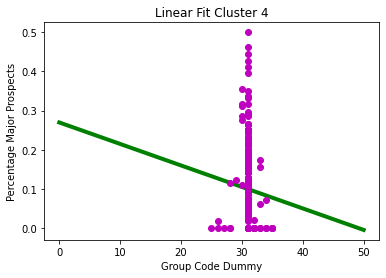

0.48342817532788246 -0.01926610016116842
[ 0.48342817 -0.0192661 ]


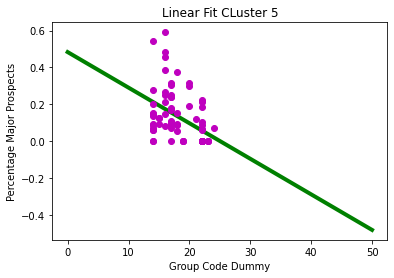

In [ ]:
#Regression - Percentage Major Prospects
from scipy.stats import linregress 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 

# linear fit cluster 1
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==0,0], data[index==0,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==0,0], data[index==0,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 1") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage Major Prospects')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==0,0], data[index==0,1], 'om') 
# display figure 
plt.show() 

# linear fit cluster 2
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==1,0], data[index==1,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==1,0], data[index==1,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 2") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage Major Prospects')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==1,0], data[index==1,1], 'om') 
# display figure 
plt.show() 

# linear fit cluster 3
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==2,0], data[index==2,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==2,0], data[index==2,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 3") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage Major Prospects')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==2,0], data[index==2,1], 'om') 
# display figure 
plt.show() 

# linear fit cluster 4
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==3,0], data[index==3,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==3,0], data[index==3,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit Cluster 4") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage Major Prospects')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==3,0], data[index==3,1], 'om') 
# display figure  
plt.show() 

# linear fit cluster 5
linSlope, linIntercept, linR, linP, linSE = linregress (data[index==4,0], data[index==4,1])
print(linIntercept, linSlope) 
att, var = curve_fit(lambda dem, itc, slp: itc + slp * dem, data[index==4,0], data[index==4,1]) 
print(att) 

dem = np.linspace(0, 50) 
# plot linear fit 
plt.title("Linear Fit CLuster 5") 
plt.xlabel('Group Code Dummy')
plt.ylabel('Percentage Major Prospects')
plot(dem, linIntercept + linSlope * dem, '-g', linewidth=4) 
plot(data[index==4,0], data[index==4,1], 'om') 
# display figure 
plt.show() 

In [ ]:
#Regression Results - Percentage Major Prospects
linSlope0, linIntercept0, linR0, linP0, linSE0 = linregress (data[index==0,0], data[index==0,1])
print(linP0)
linSlope1, linIntercept1, linR1, linP1, linSE1 = linregress (data[index==1,0], data[index==1,1])
print(linP1)
linSlope2, linIntercept2, linR2, linP2, linSE2 = linregress (data[index==2,0], data[index==2,1])
print(linP2)
linSlope3, linIntercept3, linR3, linP3, linSE3 = linregress (data[index==3,0], data[index==3,1])
print(linP3)
linSlope4, linIntercept4, linR4, linP4, linSE4 = linregress (data[index==4,0], data[index==4,1])
print(linP4)

0.011980464480405533
0.19774873164075338
0.17874182806292047
0.46795632066457626
4.949278140936414e-05


In [ ]:
print(data[index==1,:])

[[4.20000000e+01 0.00000000e+00]
 [4.30000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.40000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.10000000e+01 1.25000000e-01]
 [4.80000000e+01 1.58730159e-02]
 [4.10000000e+01 1.11111111e-01]
 [4.10000000e+01 0.00000000e+00]
 [4.60000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.30000000e+01 2.70270270e-02]
 [4.10000000e+01 0.00000000e+00]
 [4.20000000e+01 0.00000000e+00]
 [3.60000000e+01 0.00000000e+00]
 [4.20000000e+01 0.00000000e+00]
 [3.80000000e+01 1.73310225e-03]
 [3.80000000e+01 0.00000000e+00]
 [3.90000000e+01 2.38095238e-02]
 [3.60000000e+01 0.00000000e+00]
 [4.50000000e+01 0.00000000e+00]
 [3.80000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [4.10000000e+01 0.00000000e+00]
 [3.90000000e+01 0.00000000e+00]
 [4.20000000e+01 1.39860140e-02]
 [4.10000000e+01 0.00000000e+00]
 [3.80000000e+01 0.00000000e+00]
 [3.800000

Text(0.5, 1.0, '2019-20 Percentage of Major Prospects \n vs Group Code and Average Age')

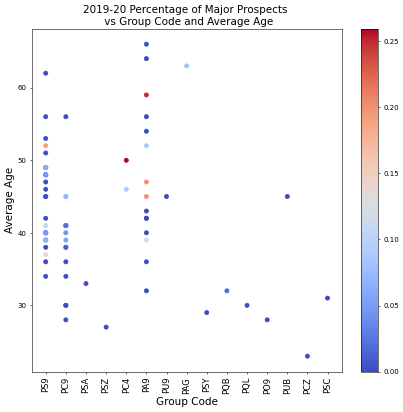

In [ ]:
import pandas as pd
d19 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2019-20')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(d19['Group Code'], d19['Average Age'], c=d19['Percentage Major Prospect'],cmap=plt.cm.coolwarm, label = 1-d19['Percentage Major Prospect'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2019-20 Percentage of Major Prospects \n vs Group Code and Average Age', size=15)

Text(0.5, 1.0, '2018-19 Percentage of Major Prospects \n vs Group Code and Average Age')

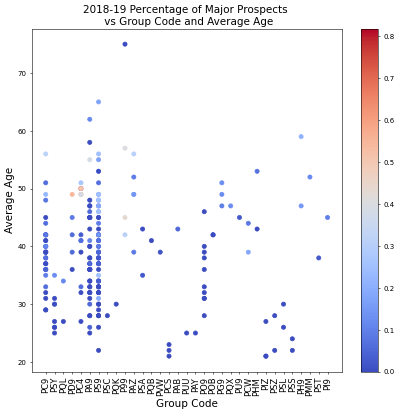

In [ ]:
import pandas as pd
d18 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2018-19')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(d18['Group Code'], d18['Average Age'], c=d18['Percentage Major Prospect'],cmap=plt.cm.coolwarm, label = 1-d18['Percentage Major Prospect'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2018-19 Percentage of Major Prospects \n vs Group Code and Average Age', size=15)

Text(0.5, 1.0, '2017-18 Percentage of Major Prospects \n vs Group Code and Average Age')

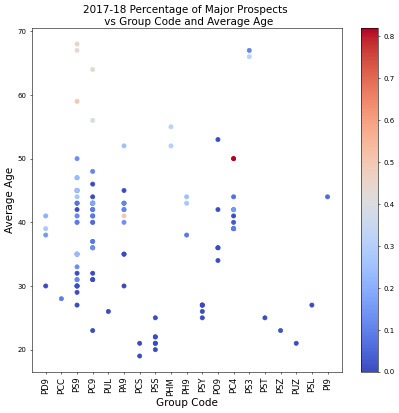

In [ ]:
import pandas as pd
d17 = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name='2017-18')
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,20),dpi = 50)

plt.subplot(211)
plt.scatter(d17['Group Code'], d17['Average Age'], c=d17['Percentage Major Prospect'],cmap=plt.cm.coolwarm, label = 1-d17['Percentage Major Prospect'])
plt.xlabel('Group Code', size=15)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Age', size = 15)
plt.colorbar()
plt.title('2017-18 Percentage of Major Prospects \n vs Group Code and Average Age', size=15)

# **Date**

(Mission 1)

In [ ]:
#split Event Date into Year, Month, and Day
df_date = df.join(df['Event Date'].astype(str).str.split('-',expand= True).rename(columns={0:'Year', 1:'Month', 2:'Day'}))
df_date

Event Name  ... Day
2019-20 0                             Ocean City Summer Party  ...  06
        1   Neurodiversity on Campus and in the Workplace ...  ...  10
        2                               Northern NJ Terps TPN  ...  11
        3   Philly Terps: Young Alumni Happy Hour Summer S...  ...  11
        4            Philly Terps Suite Night at the Ballpark  ...  14
...                                                       ...  ...  ..
2013-14 9                  Baltimore Orioles Bullpen Pregame   ...  13
        10                                      50th Reunion   ...  21
        11                                     Ring Ceremony   ...  21
        12                                  Terps on the Hill  ...  12
        13                NY Terps Alumnae Networking Dinner   ...  24

[622 rows x 18 columns]

In [ ]:
#select specific columns for further analyzing 
attendees = df_date[['Group Code','Percentage First Time Attendees','First Time Attendees','Event Date','Year','Month','Major Prospects', 'Percentage Major Prospect']]
attendees['Year&Month'] = attendees['Year'] + "/" + attendees['Month']
attendees

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Group Code  ...  Year&Month
2019-20 0         PS9  ...     2019/07
        1         PC9  ...     2019/07
        2         PC9  ...     2019/07
        3         PS9  ...     2019/07
        4         PS9  ...     2019/07
...               ...  ...         ...
2013-14 9         PS9  ...     2014/05
        10        PS3  ...     2014/05
        11        PSS  ...     2014/05
        12        PD9  ...     2014/06
        13        PCW  ...     2014/06

[622 rows x 9 columns]

In [ ]:
# group by Year and Month for recalculating monthly average
attendees_date = attendees.groupby(['Year','Month','Year&Month']).mean().reset_index()
attendees_date

Year Month  ... Major Prospects  Percentage Major Prospect
0   2013    09  ...       23.000000                   0.365079
1   2013    10  ...      131.000000                   0.385294
2   2013    12  ...       34.000000                   0.151786
3   2014    02  ...        7.000000                   0.411765
4   2014    03  ...        5.000000                   0.263158
..   ...   ...  ...             ...                        ...
65  2019    07  ...        1.750000                   0.032738
66  2019    08  ...        2.181818                   0.056260
67  2019    09  ...        0.857143                   0.045987
68  2019    10  ...        1.230769                   0.043870
69  2019    11  ...        0.473684                   0.017528

[70 rows x 7 columns]

In [ ]:
# draw time series of Percentage First Time Attendees
fig = plt.figure(figsize = (60,30),dpi = 300)

plt.plot(attendees_date['Year&Month'], attendees_date['Percentage First Time Attendees'])
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=90)
plt.xlabel('Year/Month', fontsize=50, color='red')
plt.ylabel('Percentage First Time Attendees', fontsize=40, color='red')
plt.title('Time Series', fontsize=70)


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Time Series')

In [ ]:
# split data in years (recent 4 years)
analysis_2019 = attendees_date.query("Year == '2019'")
analysis_2018 = attendees_date.query("Year == '2018'")
analysis_2017 = attendees_date.query("Year == '2017'")
analysis_2016 = attendees_date.query("Year == '2016'")

Text(0.5, 1.0, 'Percentage First Time Attendees vs Month')

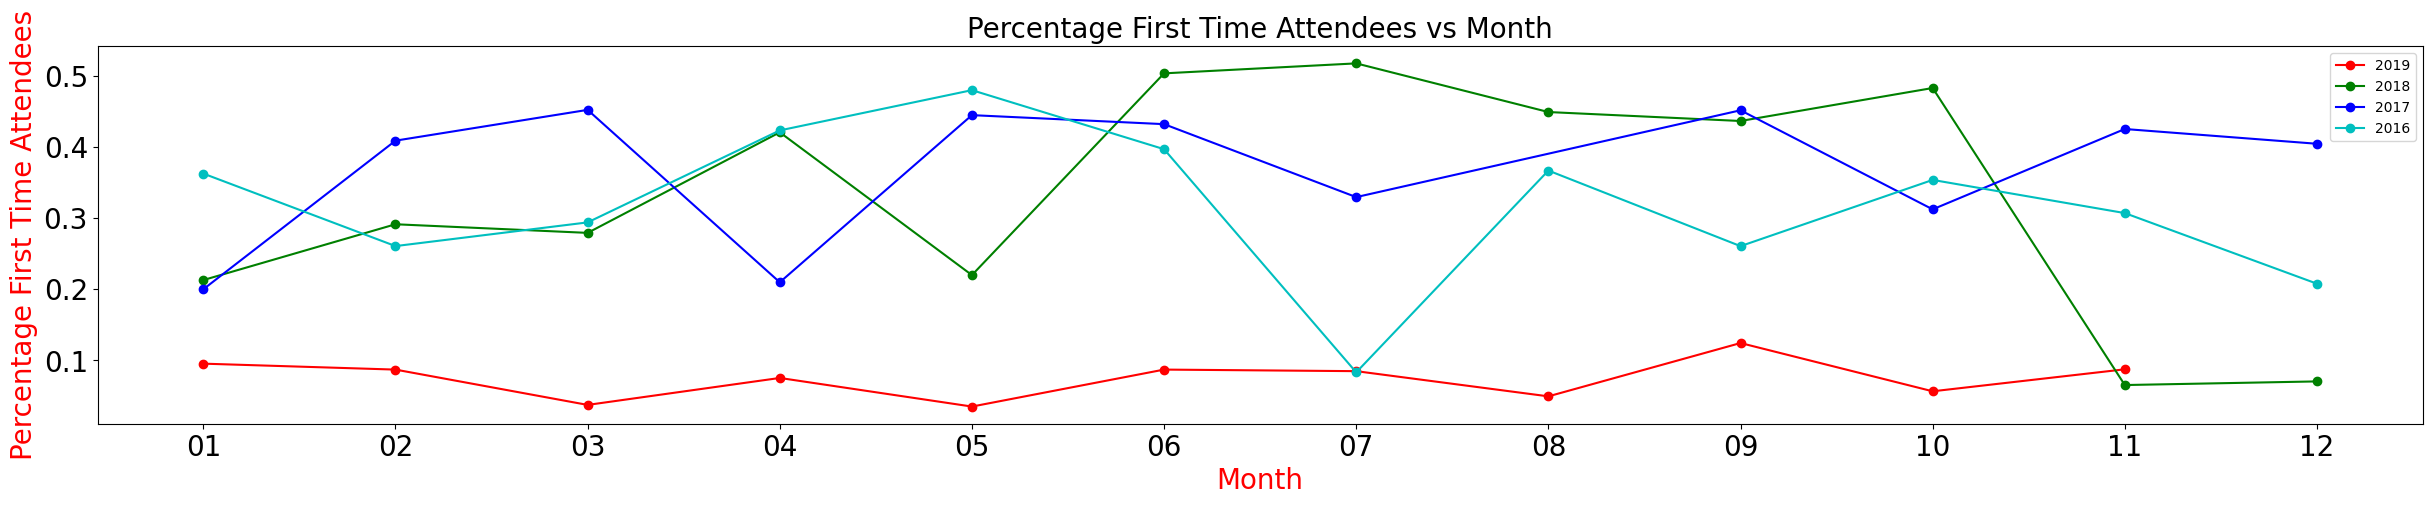

In [ ]:
# draw and compare monthly time series of Percentage First Time Attendees in recent 4 years
fig = plt.figure(figsize = (30,5),dpi = 100)

plt.plot(analysis_2019['Month'], analysis_2019['Percentage First Time Attendees'], 'ro-', label = '2019')
plt.plot(analysis_2018['Month'], analysis_2018['Percentage First Time Attendees'], 'go-', label = '2018')
plt.legend()
plt.xlabel('Month', fontsize=20, color='red')
plt.ylabel('Percentage First Time Attendees', fontsize=20, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(analysis_2017['Month'], analysis_2017['Percentage First Time Attendees'], 'bo-', label = '2017')
plt.legend()

plt.plot(analysis_2016['Month'], analysis_2016['Percentage First Time Attendees'], 'co-', label = '2016')
plt.legend()

plt.title('Percentage First Time Attendees vs Month', fontsize=20)

Text(0.5, 1.0, 'Number of First Time Attendees vs Month')

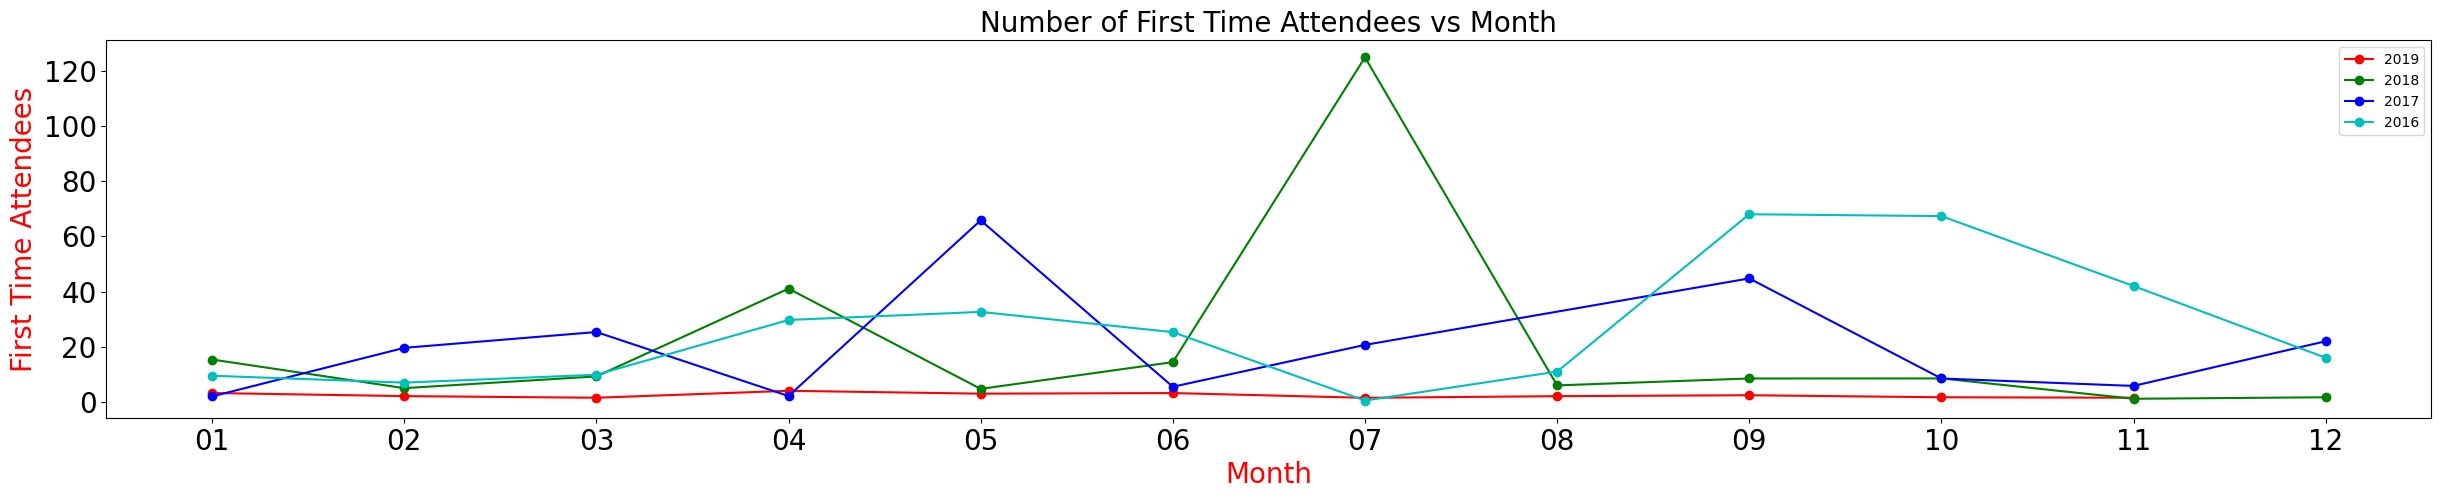

In [ ]:
# draw and compare monthly time series of number of First Time Attendees in recent 4 years
fig = plt.figure(figsize = (30,5),dpi = 100)


plt.plot(analysis_2019['Month'], analysis_2019['First Time Attendees'], 'ro-', label = '2019')
plt.plot(analysis_2018['Month'], analysis_2018['First Time Attendees'], 'go-', label = '2018')
plt.legend()
plt.xlabel('Month', fontsize=20, color='red')
plt.ylabel('First Time Attendees', fontsize=20, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(analysis_2017['Month'], analysis_2017['First Time Attendees'], 'bo-', label = '2017')
plt.legend()

plt.plot(analysis_2016['Month'], analysis_2016['First Time Attendees'], 'co-', label = '2016')
plt.legend()
plt.title('Number of First Time Attendees vs Month', fontsize=20)



(Mission 2)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Time Series')

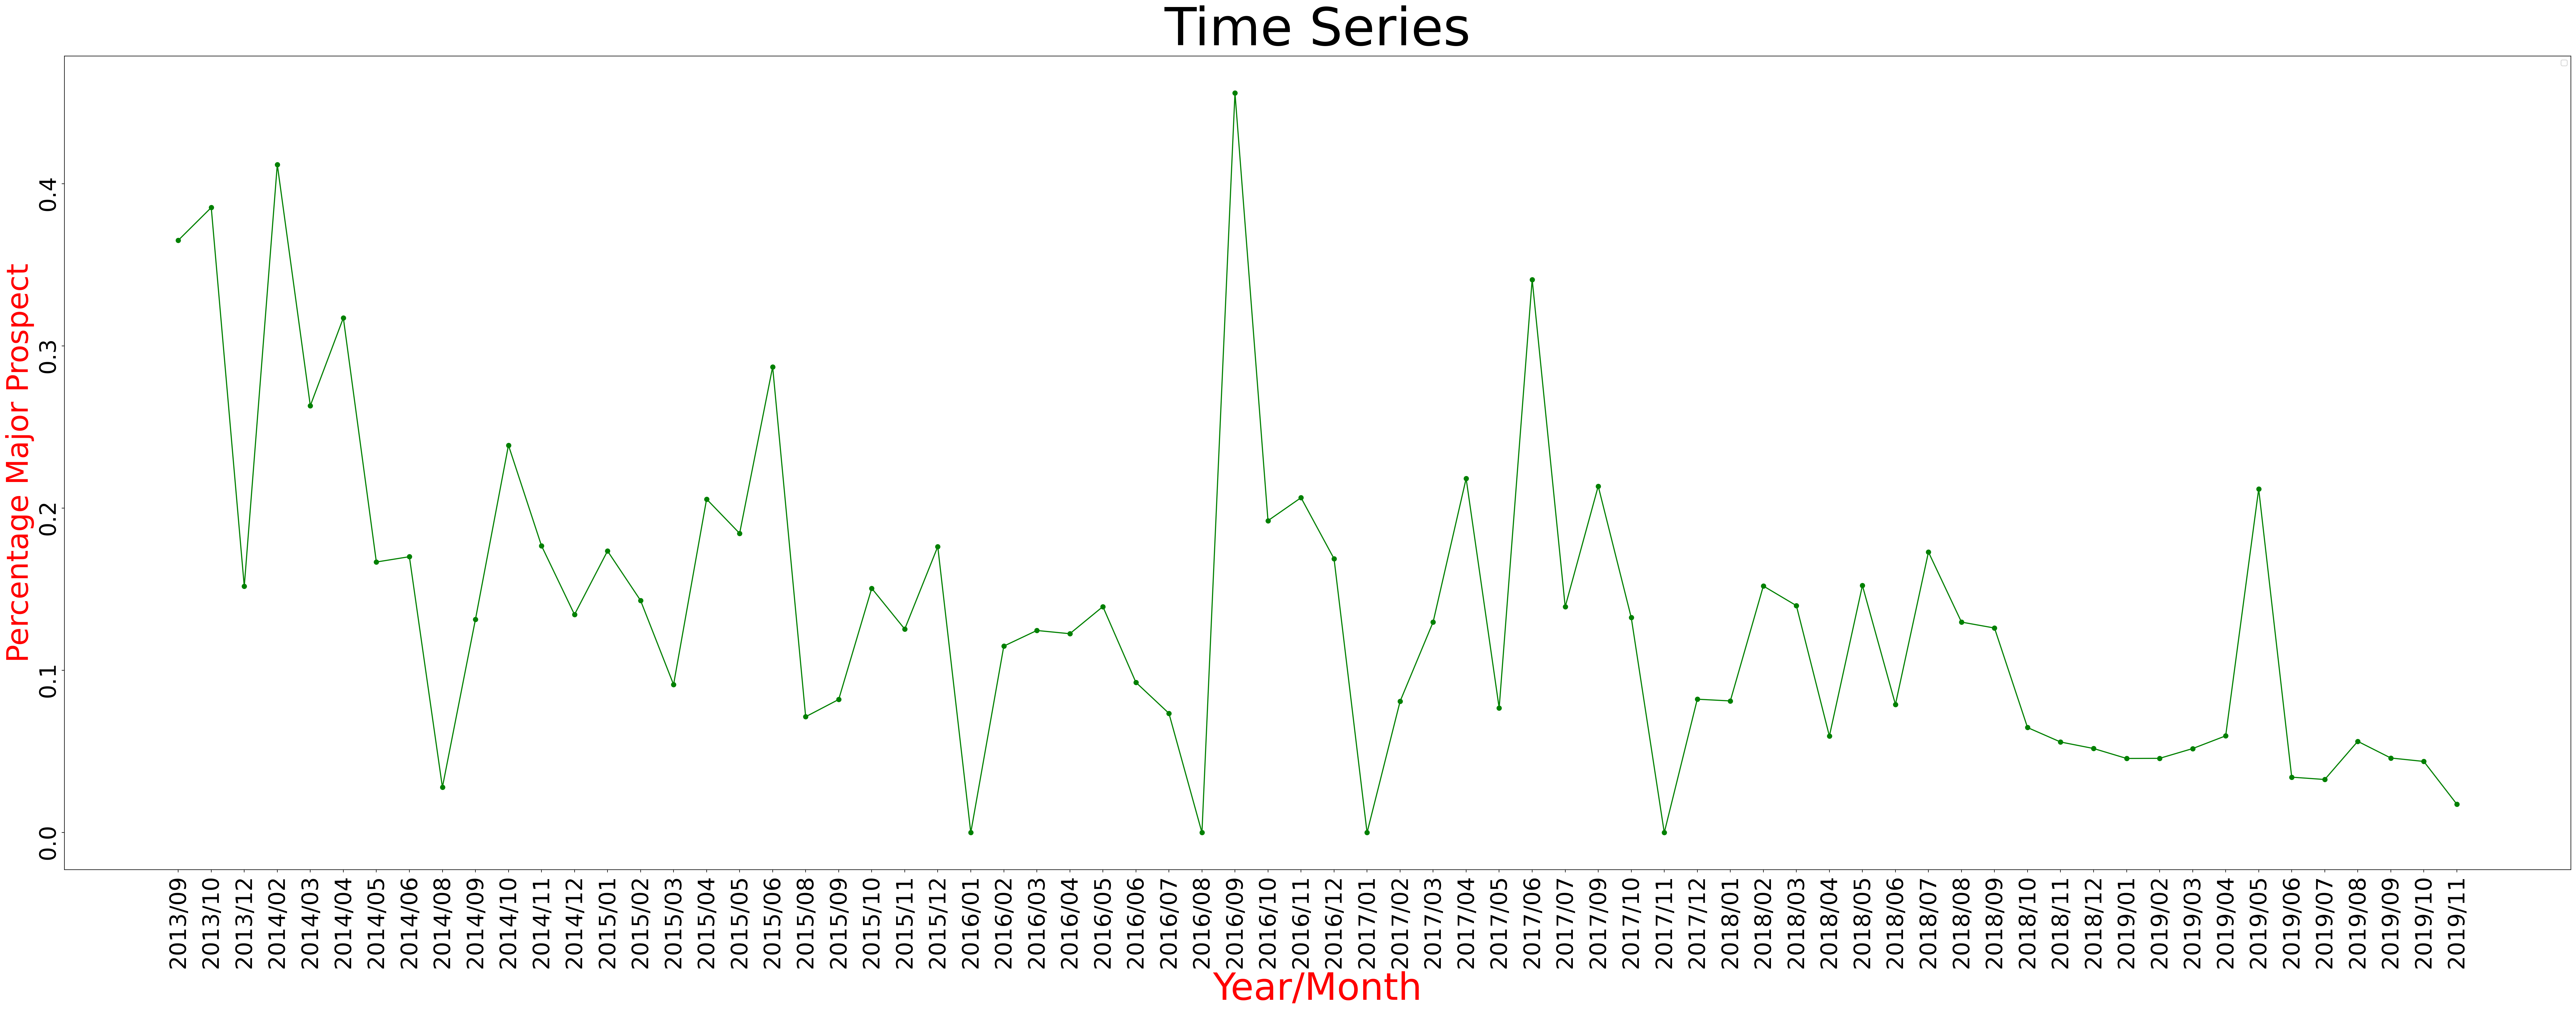

In [ ]:
# draw time series of Percentage Major Prospect
fig = plt.figure(figsize = (60,20),dpi = 200)

plt.plot(attendees_date['Year&Month'], attendees_date['Percentage Major Prospect'], 'go-')
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=90)
plt.xlabel('Year/Month', fontsize=50, color='red')
plt.ylabel('Percentage Major Prospect', fontsize=40, color='red')
plt.title('Time Series', fontsize=70)

Text(0.5, 1.0, 'Percentage Major Prospect vs Month')

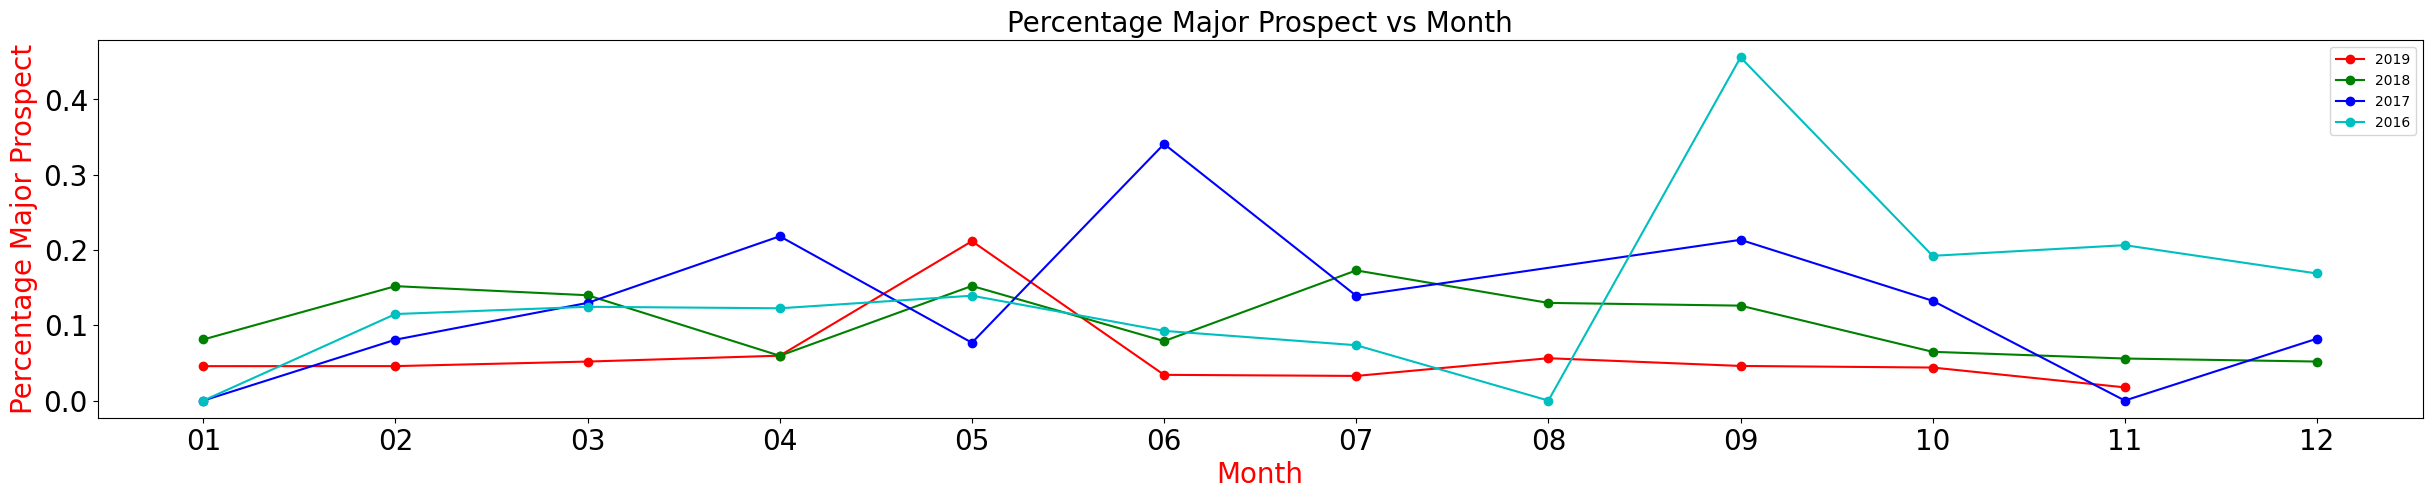

In [ ]:
# draw and compare monthly time series of Percentage Major Prospect in recent 4 years
fig = plt.figure(figsize = (30,5),dpi = 100)

plt.plot(analysis_2019['Month'], analysis_2019['Percentage Major Prospect'], 'ro-', label = '2019')
plt.plot(analysis_2018['Month'], analysis_2018['Percentage Major Prospect'], 'go-', label = '2018')
plt.legend()
plt.xlabel('Month')
plt.plot(analysis_2017['Month'], analysis_2017['Percentage Major Prospect'], 'bo-', label = '2017')
plt.legend()
plt.xlabel('Month')
plt.plot(analysis_2016['Month'], analysis_2016['Percentage Major Prospect'], 'co-', label = '2016')
plt.legend()
plt.xlabel('Month')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Month', fontsize=20, color='red')
plt.ylabel('Percentage Major Prospect', fontsize=20, color='red')

plt.title('Percentage Major Prospect vs Month', fontsize=20)

Text(0.5, 1.0, 'Number of Major Prospects vs Month')

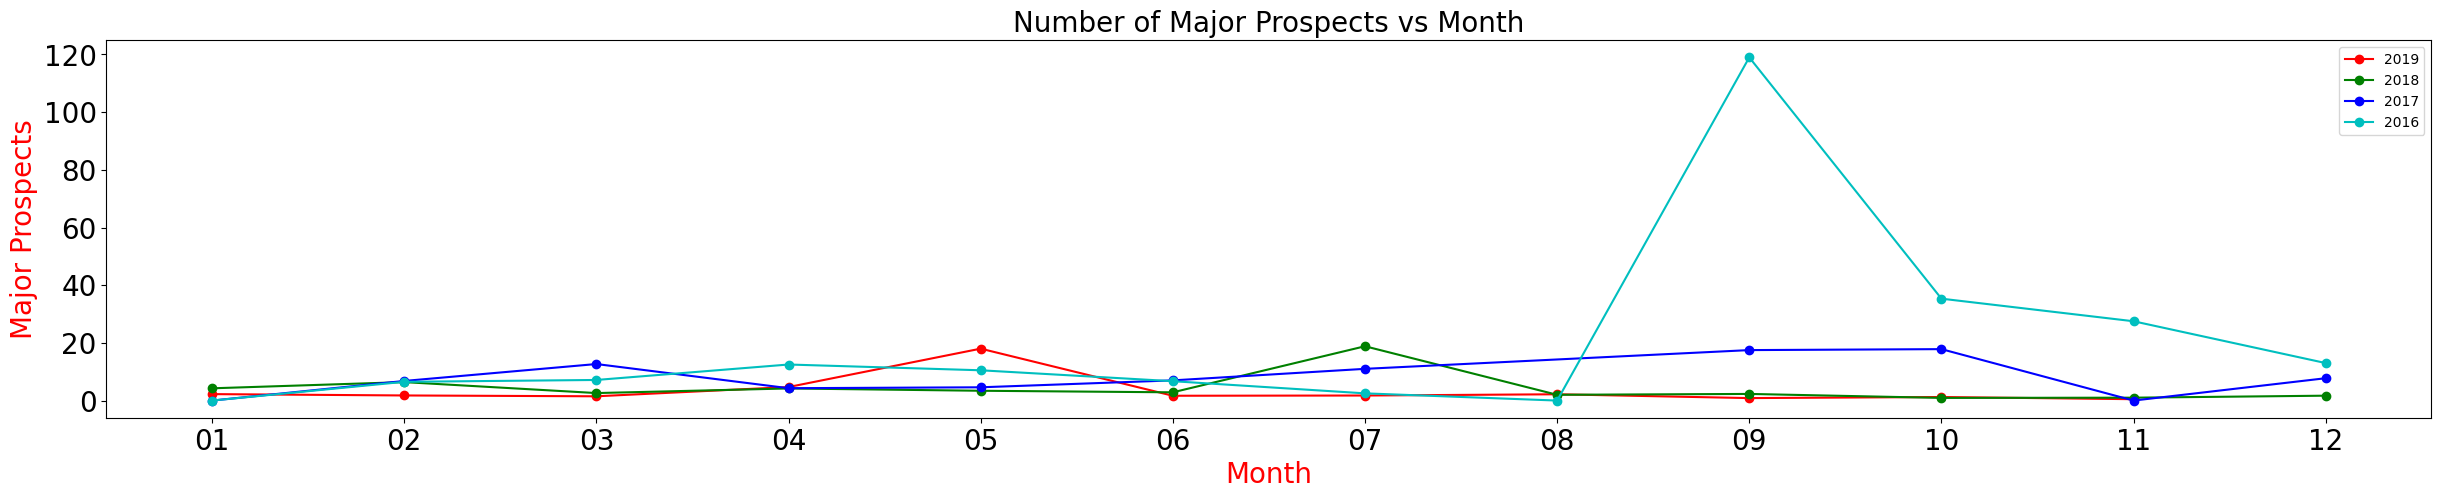

In [ ]:
# draw and compare monthly time series of number of Major Prospects in recent 4 years
fig = plt.figure(figsize = (30,5),dpi = 100)

plt.plot(analysis_2019['Month'], analysis_2019['Major Prospects'], 'ro-', label = '2019')
plt.plot(analysis_2018['Month'], analysis_2018['Major Prospects'], 'go-', label = '2018')
plt.legend()
plt.xlabel('Month')
plt.plot(analysis_2017['Month'], analysis_2017['Major Prospects'], 'bo-', label = '2017')
plt.legend()
plt.xlabel('Month')
plt.plot(analysis_2016['Month'], analysis_2016['Major Prospects'], 'co-', label = '2016')
plt.legend()
plt.xlabel('Month')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Month', fontsize=20, color='red')
plt.ylabel('Major Prospects', fontsize=20, color='red')

plt.title('Number of Major Prospects vs Month', fontsize=20)

# **Location**

**Mission 1: Increase First Time Attendees**

In [ ]:
df.describe()
# As the Avg for Percentage First Time Attendees is 0.276 and the Std is 0.24 
# --> use 0.3 as a criteria to list prospective locations for First Time Attendees

Participated  Average Age  ...  Percentage Major Prospect  GroupCode_dum
count    622.000000   622.000000  ...                 622.000000     622.000000
mean      44.803859    40.117363  ...                   0.102214      18.496785
std       93.165049     9.741459  ...                   0.131444      13.662689
min        1.000000    19.000000  ...                   0.000000       0.000000
25%       10.000000    33.000000  ...                   0.000000       8.000000
50%       20.000000    40.000000  ...                   0.058824      17.000000
75%       44.750000    46.000000  ...                   0.166667      31.000000
max     1657.000000    75.000000  ...                   0.818182      48.000000

[8 rows x 7 columns]

In [ ]:
# List the Top 10 Locations with:
# 1. The sum of First Time Attendees
# 2. The count of events with the % of First Time Attendees > 0.30 hosted in that Location
# 3. Sorted by the sum of First Time Attendees
finalFT = (df.assign(newFT = df['First Time Attendees'].where(df['First Time Attendees'] > 0), 
        newFTPCT = df['Percentage First Time Attendees'].where(df['Percentage First Time Attendees'] > 0.30))
             .groupby(df['Location Code'])
             .aggregate(sum = ('newFT', 'sum'),
                        count = ('newFTPCT', 'count')))
finalFTsorted = finalFT.sort_values(by = 'sum', ascending = False)
finalFTsorted[:10].copy()

sum  count
Location Code               
PDON           3657.0     58
POWE           1015.0     14
PDDC            501.0     18
PNNY            429.0     10
PDNA            409.0     20
PDBA            369.0     18
PDMC            315.0     18
PWLA            206.0     11
PDAN            155.0      8
PSAU            140.0      1

In [ ]:
# Creating a new df to store the Avg First Time Attendees grouped by Group Code and Location Code
df2= df.groupby(['Group Code','Location Code']).agg({'First Time Attendees':'mean'}).sort_values(by='First Time Attendees', ascending=False).reset_index()
df2

Group Code Location Code  First Time Attendees
0          PSS          PDON            106.142857
1          PS9          PSAU             70.000000
2          PC9          PDNA             54.000000
3          PA9          PNNA             52.000000
4          PA9          PDON             51.142857
..         ...           ...                   ...
169        PA9          PDES              0.000000
170        PA9          PWSD              0.000000
171        PQB          PDMC              0.000000
172        PA9          PNDE              0.000000
173        PSZ          PNBO              0.000000

[174 rows x 3 columns]

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Assigning data associated with each Location above into new df and combine (concat) those df into another df 
# to show all the events hosted in that location along with their Avg First Time Attendees
# Filter out the events hosted in that location with no First Time Attendees
df_11 = df2.loc[(df2["Location Code"]=="PDON")]
df_12 = df2.loc[(df2["Location Code"]=="POWE")]
df_13 = df2.loc[(df2["Location Code"]=="PDDC")]
df_14 = df2.loc[(df2["Location Code"]=="PNNY")]
df_15 = df2.loc[(df2["Location Code"]=="PDNA")]
df_16 = df2.loc[(df2["Location Code"]=="PDBA")]
df_17 = df2.loc[(df2["Location Code"]=="PDMC")]
df_18 = df2.loc[(df2["Location Code"]=="PWLA")]
df_19 = df2.loc[(df2["Location Code"]=="PDAN")]
df_20 = df2.loc[(df2["Location Code"]=="PSAU")]
df_row_FT = pd.concat([df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20], axis = 0)
print(df_row_FT)
df_plot_FT = df_row_FT[df_row_FT['First Time Attendees']!=0]

   Group Code Location Code  First Time Attendees
0         PSS          PDON            106.142857
4         PA9          PDON             51.142857
6         PI9          PDON             45.333333
7         PSZ          PDON             44.000000
8         PM9          PDON             37.333333
..        ...           ...                   ...
45        PD9          PDAN             11.666667
80        PA9          PDAN              6.666667
90        PSY          PDAN              6.000000
95        PO9          PDAN              5.500000
1         PS9          PSAU             70.000000

[91 rows x 3 columns]


In [ ]:
# Plot Top locations for First Time Attendees with information of events hosted
import plotly.express as px
fig = px.sunburst(df_plot_FT, path=['Location Code', 'Group Code'], values='First Time Attendees', title = "Top locations for First Time Attendees with information of events hosted", color='First Time Attendees')
fig.show()

**Mission 2: Increase Major Prospects**

In [ ]:
df.describe()
# As the Avg for Percentage Major Prospect is 0.10 and the Std is 0.13 
# --> use 0.15 as a criteria to list prospective locations for Major Prospects

Participated  Average Age  ...  Percentage Major Prospect  GroupCode_dum
count    622.000000   622.000000  ...                 622.000000     622.000000
mean      44.803859    40.117363  ...                   0.102214      18.496785
std       93.165049     9.741459  ...                   0.131444      13.662689
min        1.000000    19.000000  ...                   0.000000       0.000000
25%       10.000000    33.000000  ...                   0.000000       8.000000
50%       20.000000    40.000000  ...                   0.058824      17.000000
75%       44.750000    46.000000  ...                   0.166667      31.000000
max     1657.000000    75.000000  ...                   0.818182      48.000000

[8 rows x 7 columns]

In [ ]:
# List the Top 10 Locations with:
# 1. The sum of Major Prospects
# 2. The count of events with the % of Major Prospects > 0.15 hosted in that Location
# 3. Sorted by the sum of Major Prospects
finalMP = (df.assign(newMP = df['Major Prospects'].where(df['Major Prospects'] > 0), 
        newPCT = df['Percentage Major Prospect'].where(df['Percentage Major Prospect'] > 0.15))
             .groupby(df['Location Code'])
             .aggregate(sum = ('newMP', 'sum'),
                        count = ('newPCT', 'count')))
finalMPsorted = finalMP.sort_values(by = 'sum', ascending = False)
finalMPsorted[:10].copy()

sum  count
Location Code               
PDON           1539.0     46
PNNY            519.0     16
PDBA            179.0      6
PDDC            162.0      5
POWE            140.0      2
PDMC            136.0      9
PDNA            125.0     11
PNNA            104.0      4
PWSF            103.0      5
PDAN            101.0      5

In [ ]:
# Creating a new df to store the Avg Major Prospects grouped by Group Code and Location Code
df3= df.groupby(['Group Code','Location Code']).agg({'Major Prospects':'mean'}).sort_values(by='Major Prospects', ascending=False).reset_index()
df3

Group Code Location Code  Major Prospects
0          PA9          PNNA        51.000000
1          PH9          PDON        44.666667
2          PHM          PDBA        36.000000
3          PA9          PDON        32.428571
4          PC9          PDNA        30.000000
..         ...           ...              ...
169        PSC          PDON         0.000000
170        PS9          PDWE         0.000000
171        PSK          PDON         0.000000
172        PSL          PDNA         0.000000
173        PO9          PDBA         0.000000

[174 rows x 3 columns]

In [ ]:
# Assigning data associated with each Location above into new df and combine (concat) those df into another df 
# to show all the events hosted in that location along with their Avg Major Prospects
# Filter out the events hosted in that location with no Major Prospects
df_1 = df3.loc[(df3["Location Code"]=="PDON")]
df_2 = df3.loc[(df3["Location Code"]=="PNNY")]
df_3 = df3.loc[(df3["Location Code"]=="PDBA")]
df_4 = df3.loc[(df3["Location Code"]=="PDDC")]
df_5 = df3.loc[(df3["Location Code"]=="POWE")]
df_6 = df3.loc[(df3["Location Code"]=="PDMC")]
df_7 = df3.loc[(df3["Location Code"]=="PDNA")]
df_8 = df3.loc[(df3["Location Code"]=="PNNA")]
df_9 = df3.loc[(df3["Location Code"]=="PWSF")]
df_10 = df3.loc[(df3["Location Code"]=="PDAN")]
df_row = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], axis = 0)
print(df_row)
df_plot = df_row[df_row['Major Prospects']!=0]

    Group Code Location Code  Major Prospects
1          PH9          PDON        44.666667
3          PA9          PDON        32.428571
6          PM9          PDON        28.333333
8          PS3          PDON        21.400000
10         PHM          PDON        18.500000
..         ...           ...              ...
14         PA9          PDAN        12.666667
25         PD9          PDAN         8.333333
59         PS9          PDAN         3.666667
109        PO9          PDAN         1.000000
132        PSY          PDAN         0.000000

[91 rows x 3 columns]


In [ ]:
# Plot Top locations for Major Prospects with information of events hosted
import plotly.express as px
fig = px.sunburst(df_plot, path=['Location Code', 'Group Code'], values='Major Prospects', title = "Top locations for Major Prospects with information of events hosted", color='Major Prospects')
fig.show()